In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# import the data
df=pd.read_csv("concrete_data.csv")
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


# Data Preprocessing, EDA and Data engineering

In [3]:
# check for null values
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [4]:
# check for data type of each column
df.dtypes

Cement                float64
Blast Furnace Slag    float64
Fly Ash               float64
Water                 float64
Superplasticizer      float64
Coarse Aggregate      float64
Fine Aggregate        float64
Age                     int64
Strength              float64
dtype: object

In [5]:
# delete the duplicate values
df.drop_duplicates(inplace=True)

In [6]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [7]:
# describe the data

In [8]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


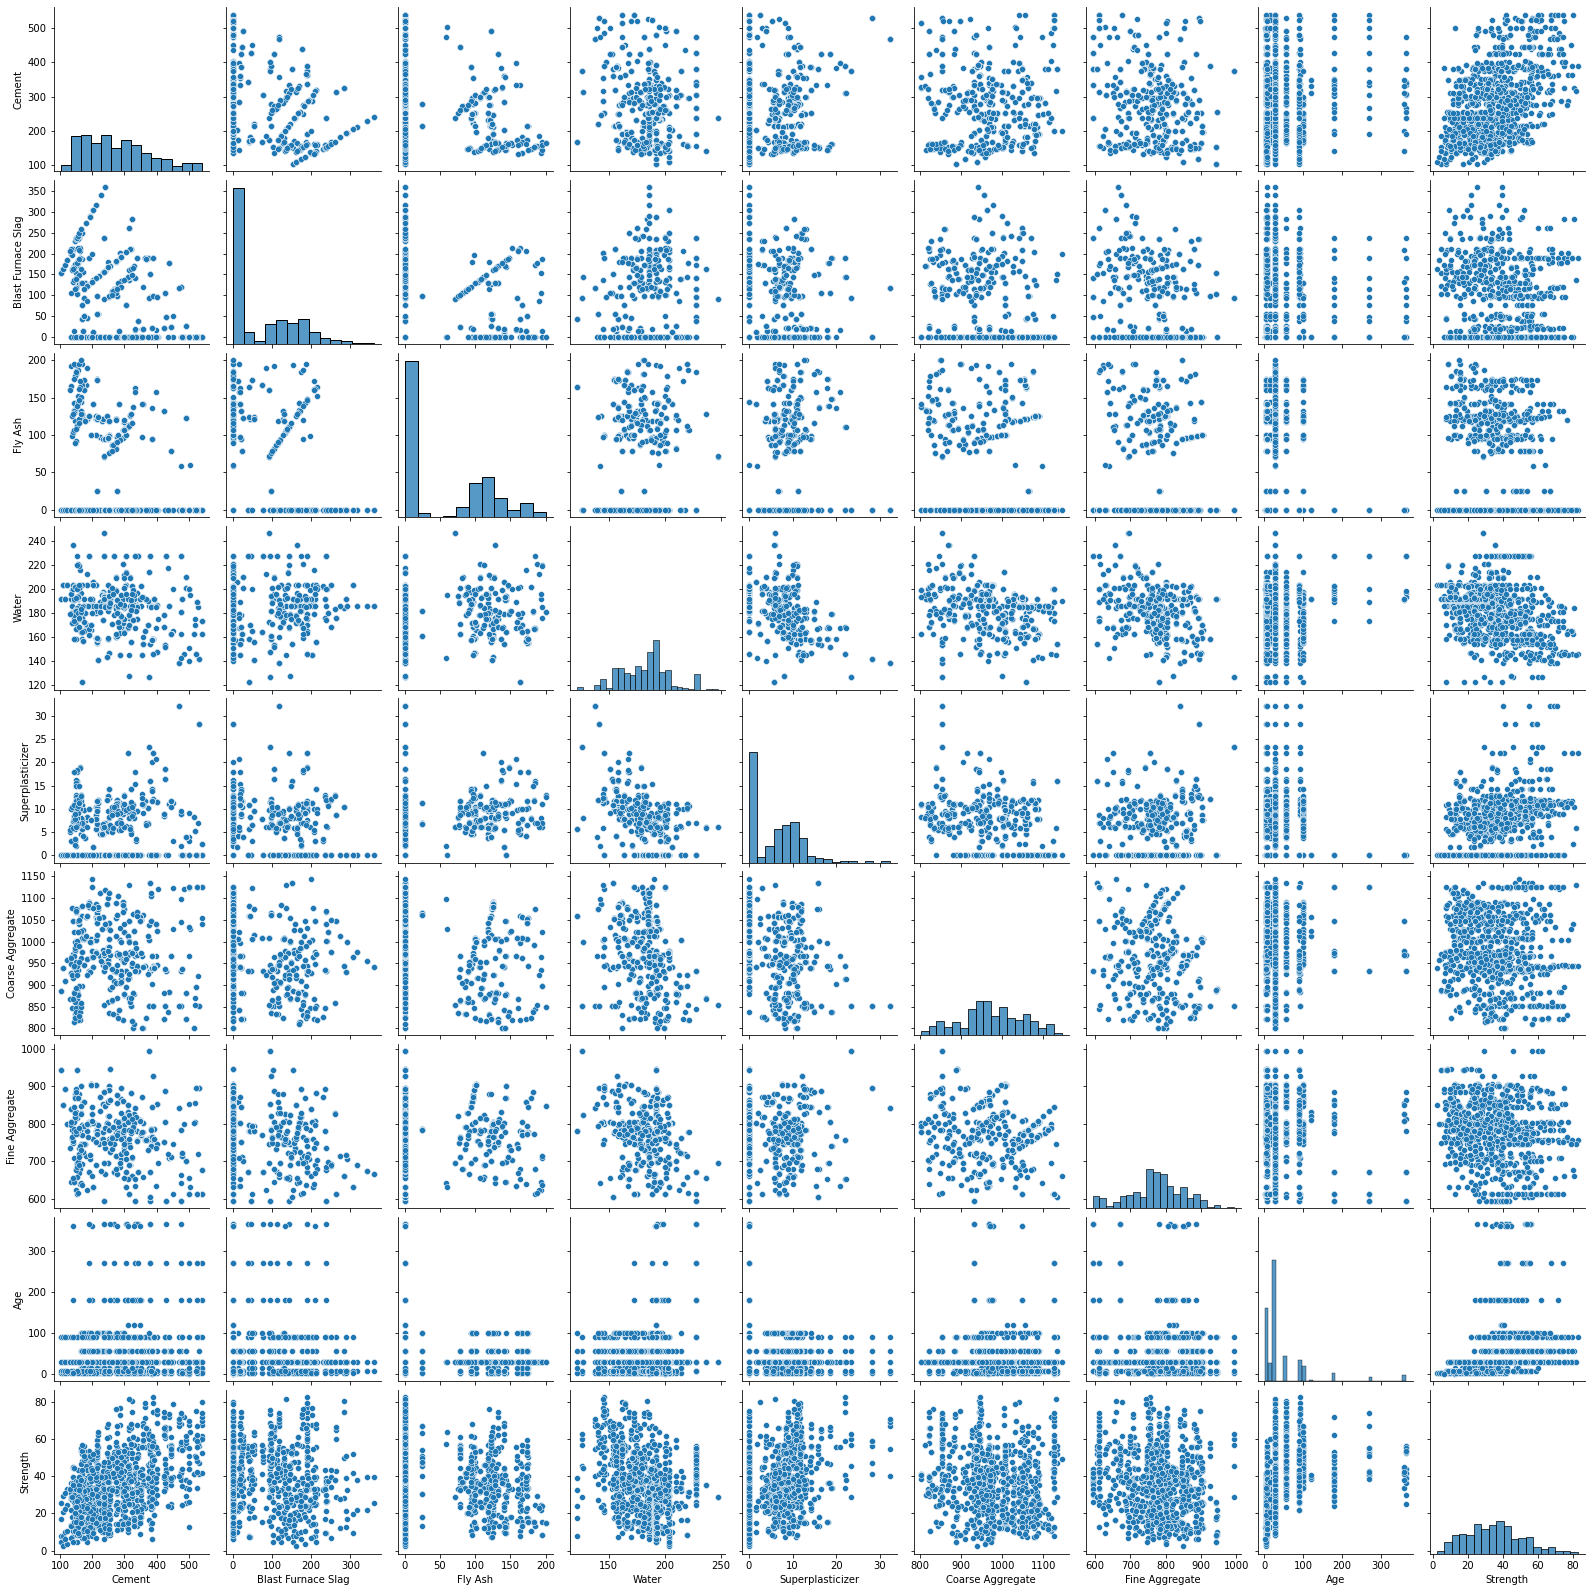

In [9]:
# Understand each column
import seaborn as sns
sns.pairplot(df)

In [10]:
# we have to work on columns some of them have skewed data

In [11]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

(array([ 63., 171., 151., 154., 144., 109.,  93.,  46.,  34.,  40.]),
 array([102. , 145.8, 189.6, 233.4, 277.2, 321. , 364.8, 408.6, 452.4,
        496.2, 540. ]),
 <BarContainer object of 10 artists>)

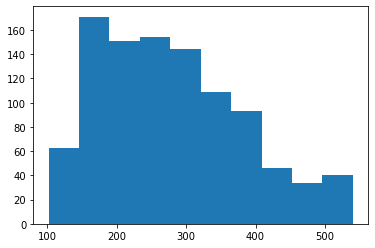

In [12]:
#1) Cement
plt.hist(df["Cement"])

(array([ 12.,  36., 136.,  92., 115., 153., 160., 139.,  88.,  74.]),
 array([4.62497281, 4.79163245, 4.95829208, 5.12495171, 5.29161134,
        5.45827098, 5.62493061, 5.79159024, 5.95824987, 6.12490951,
        6.29156914]),
 <BarContainer object of 10 artists>)

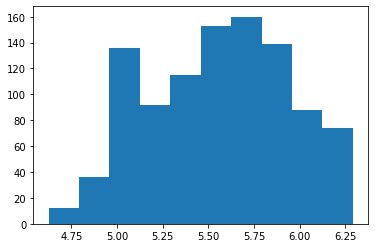

In [13]:
# as you can see the data is not skewed hence no need of transformation
trans=np.log(df["Cement"])
plt.hist(trans)

(array([ 16., 122., 132., 121., 153., 150., 100.,  99.,  63.,  49.]),
 array([10.09950494, 11.41334445, 12.72718397, 14.04102348, 15.35486299,
        16.66870251, 17.98254202, 19.29638154, 20.61022105, 21.92406056,
        23.23790008]),
 <BarContainer object of 10 artists>)

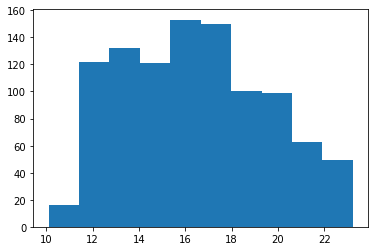

In [14]:
sqrt=[i**0.5 for i in df["Cement"]]
plt.hist(sqrt)

### Data is a bit skewed hence if we use square root transformation it is almost following normal distribution hence we use square root transformation for cement column

In [15]:
df["Cement"]=sqrt

(array([ 16., 122., 132., 121., 153., 150., 100.,  99.,  63.,  49.]),
 array([10.09950494, 11.41334445, 12.72718397, 14.04102348, 15.35486299,
        16.66870251, 17.98254202, 19.29638154, 20.61022105, 21.92406056,
        23.23790008]),
 <BarContainer object of 10 artists>)

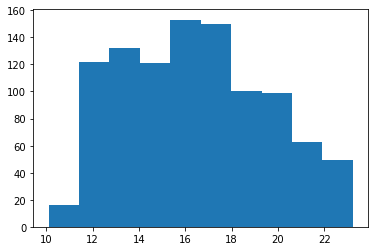

In [16]:
plt.hist(df["Cement"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb97044e250>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb97044eb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb97044e310>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb97045a0a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb97045a370>],
 'means': []}

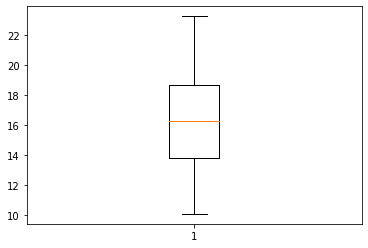

In [17]:
# check for outliers
plt.boxplot(df["Cement"])

In [18]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,23.237900,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,23.237900,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,18.234583,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,18.234583,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,14.092551,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,16.625282,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,17.949930,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,12.186058,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,12.613485,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [19]:
# as you can see there are no outliers

(array([539.,  41.,  79., 104.,  87.,  98.,  28.,  13.,  12.,   4.]),
 array([  0.  ,  35.94,  71.88, 107.82, 143.76, 179.7 , 215.64, 251.58,
        287.52, 323.46, 359.4 ]),
 <BarContainer object of 10 artists>)

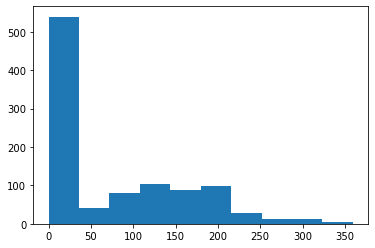

In [20]:
# 2) Blast Furnace Slag
plt.hist(df["Blast Furnace Slag"])

(array([470.,   9.,  60.,  41.,  11., 123., 128., 107.,  46.,  10.]),
 array([ 0.        ,  1.8957848 ,  3.7915696 ,  5.68735439,  7.58313919,
         9.47892399, 11.37470879, 13.27049359, 15.16627838, 17.06206318,
        18.95784798]),
 <BarContainer object of 10 artists>)

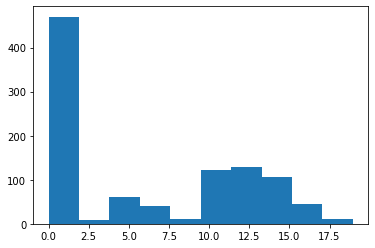

In [21]:
# as you can see the data is positively skewed 
# try square root transformation
sqrt_blast=[i**0.5 for i in df["Blast Furnace Slag"]]
plt.hist(sqrt_blast)

(array([470.,   0.,   0.,   0.,  17.,  52.,  41.,  79., 248.,  98.]),
 array([0.        , 0.58872145, 1.17744291, 1.76616436, 2.35488581,
        2.94360726, 3.53232872, 4.12105017, 4.70977162, 5.29849307,
        5.88721453]),
 <BarContainer object of 10 artists>)

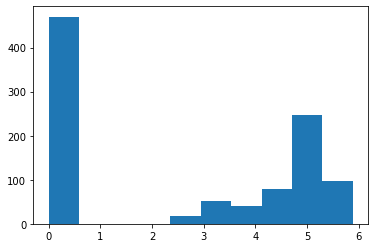

In [22]:
# try log transformation
log_blast=np.log(df["Blast Furnace Slag"]+1)
plt.hist(log_blast)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb970838130>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb9708386d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb97082af40>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb970838c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb970838f40>],
 'means': []}

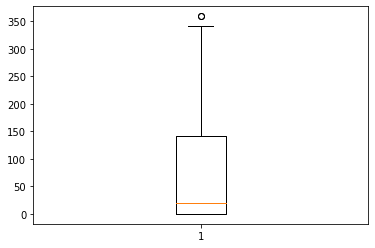

In [23]:
# keep the Blast Furnace Slag as it is
# check for outliers
plt.boxplot(df["Blast Furnace Slag"])

In [24]:
# as you can see there are some outliers
q1=df["Blast Furnace Slag"].quantile(0.25)
q3=df["Blast Furnace Slag"].quantile(0.75)
IQR=q3-q1
max1=q3+1.5*IQR
min1=q1-1.5*IQR
upper=df["Blast Furnace Slag"]>=max1
lower=df["Blast Furnace Slag"]<=min1
upper_in=[]
lower_in=[]
for i in upper.index:
    if upper[i]==True:
        upper_in.append(i)
for i in lower.index:
    if lower[i]==True:
        lower_in.append(i)

In [25]:
print(upper_in)
print(lower_in)

[553, 559]
[]


In [26]:
for i in upper_in:
    df.drop(i,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb970925a60>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb970925fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb970925790>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb9709335b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb970933880>],
 'means': []}

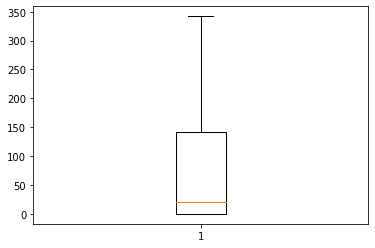

In [27]:
plt.boxplot(df["Blast Furnace Slag"])

In [28]:
# as you can see outliers are removed

In [29]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,23.237900,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,23.237900,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,18.234583,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,18.234583,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,14.092551,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,16.625282,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,17.949930,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,12.186058,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,12.613485,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


(array([539.,  15.,   2.,  24.,  94.,  96., 114.,  45.,  57.,  17.]),
 array([  0.  ,  20.01,  40.02,  60.03,  80.04, 100.05, 120.06, 140.07,
        160.08, 180.09, 200.1 ]),
 <BarContainer object of 10 artists>)

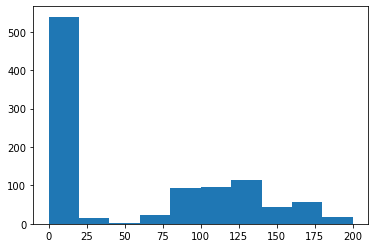

In [30]:
# 3) Fly Ash
plt.hist(df["Fly Ash"])

(array([539.,   0.,   0.,  15.,   0.,   4.,  98., 197.,  79.,  71.]),
 array([ 0.        ,  1.41456707,  2.82913414,  4.24370121,  5.65826829,
         7.07283536,  8.48740243,  9.9019695 , 11.31653657, 12.73110364,
        14.14567072]),
 <BarContainer object of 10 artists>)

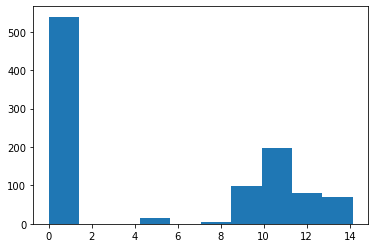

In [31]:
# as you can in fly ash 
# i willnot get properly transformed
sqrt_fly=[i**0.5 for i in df["Fly Ash"]]
plt.hist(sqrt_fly)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb970c1f970>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb970c1feb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb970c1f670>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb970c2b430>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb970c2b700>],
 'means': []}

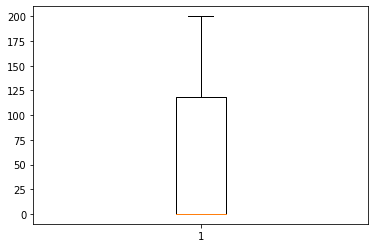

In [32]:
# hence we keep Fly Ash as it is
# check for outliers
plt.boxplot(df["Fly Ash"])

In [33]:
# there are no outliers

In [34]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,23.237900,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,23.237900,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,18.234583,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,18.234583,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,14.092551,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,16.625282,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,17.949930,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,12.186058,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,12.613485,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


(array([ 12.,  48., 107., 144., 169., 329., 107.,  29.,  54.,   4.]),
 array([121.8 , 134.32, 146.84, 159.36, 171.88, 184.4 , 196.92, 209.44,
        221.96, 234.48, 247.  ]),
 <BarContainer object of 10 artists>)

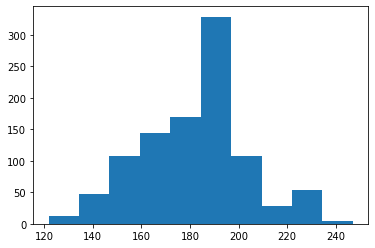

In [35]:
# 4) Water
plt.hist(df["Water"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb970e000d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb970e00670>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb970ce94f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb970e00c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb970e00f10>],
 'means': []}

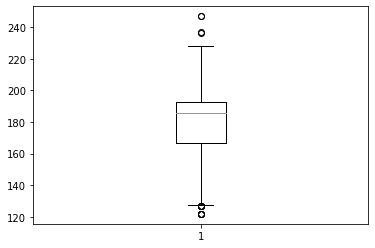

In [36]:
# the data is not skewed hence no need to transform 
# check for outliers
plt.boxplot(df["Water"])

In [37]:
# as you can see there are some outliers
q1=df["Water"].quantile(0.25)
q3=df["Water"].quantile(0.75)
IQR=q3-q1
max1=q3+1.5*IQR
min1=q1-1.5*IQR
upper=df["Water"]>=max1
lower=df["Water"]<=min1
upper_in=[]
lower_in=[]
for i in upper.index:
    if upper[i]==True:
        upper_in.append(i)
for i in lower.index:
    if lower[i]==True:
        lower_in.append(i)

In [38]:
print(upper_in)
print(lower_in)

[862, 873, 936, 1019]
[74, 97, 120, 143, 166, 224, 225, 226, 227, 228, 908]


In [39]:
# delete the outliers
for i in upper_in:
    df.drop(i,inplace=True)
for i in lower_in:
    df.drop(i,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb970e94430>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb970e94940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb970e94160>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb970e94ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb970ef91f0>],
 'means': []}

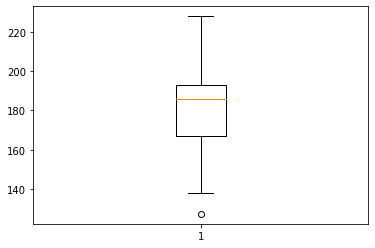

In [40]:
plt.boxplot(df["Water"])

In [41]:
# as you can see there are some outliers
q1=df["Water"].quantile(0.25)
q3=df["Water"].quantile(0.75)
IQR=q3-q1
max1=q3+1.5*IQR
min1=q1-1.5*IQR
upper=df["Water"]>=max1
lower=df["Water"]<=min1
upper_in=[]
lower_in=[]
for i in upper.index:
    if upper[i]==True:
        upper_in.append(i)
for i in lower.index:
    if lower[i]==True:
        lower_in.append(i)

In [42]:
print(upper_in)
print(lower_in)

[]
[971]


In [43]:
for i in lower_in:
    df.drop(i,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb971811f40>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb971821520>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb971811c70>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb971821ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb971821d90>],
 'means': []}

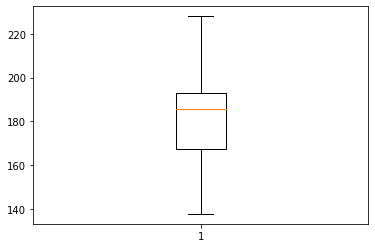

In [44]:
plt.boxplot(df["Water"])

In [45]:
# as you can see outliers are removed

In [46]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,23.237900,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,23.237900,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,18.234583,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,18.234583,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,14.092551,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,16.625282,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,17.949930,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,12.186058,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,12.613485,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


(array([392., 114., 205., 203.,  36.,  18.,   9.,   0.,   5.,   5.]),
 array([ 0.  ,  3.22,  6.44,  9.66, 12.88, 16.1 , 19.32, 22.54, 25.76,
        28.98, 32.2 ]),
 <BarContainer object of 10 artists>)

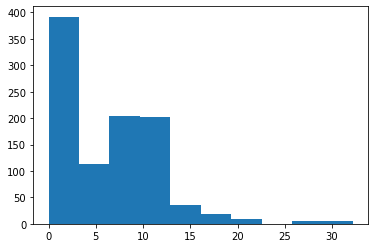

In [47]:
# 5) Superplasticizer
plt.hist(df["Superplasticizer"])

(array([376.,   0.,   4.,  11.,  44., 115., 228., 164.,  35.,  10.]),
 array([0.        , 0.35025499, 0.70050998, 1.05076496, 1.40101995,
        1.75127494, 2.10152993, 2.45178491, 2.8020399 , 3.15229489,
        3.50254988]),
 <BarContainer object of 10 artists>)

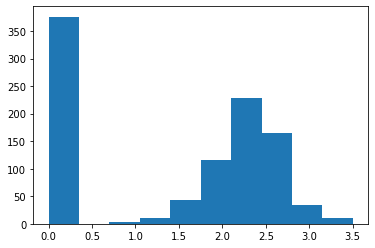

In [48]:
# as you can see  data is skewed
log_super=np.log(df["Superplasticizer"]+1)
plt.hist(log_super)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb971a6e6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb971a6ec40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb971a6e3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb971a77220>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb971a774f0>],
 'means': []}

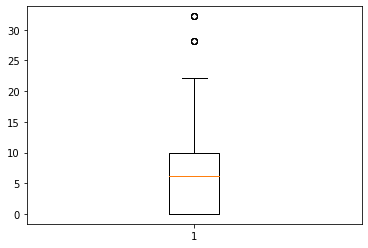

In [49]:
# we keep Superplasticizer as it is
# check for outliers
plt.boxplot(df["Superplasticizer"])

In [50]:
# as you can see there are some outliers
q1=df["Superplasticizer"].quantile(0.25)
q3=df["Superplasticizer"].quantile(0.75)
IQR=q3-q1
max1=q3+1.5*IQR
min1=q1-1.5*IQR
upper=df["Superplasticizer"]>=max1
lower=df["Superplasticizer"]<=min1
upper_in=[]
lower_in=[]
for i in upper.index:
    if upper[i]==True:
        upper_in.append(i)
for i in lower.index:
    if lower[i]==True:
        lower_in.append(i)

In [51]:
print(upper_in)
print(lower_in)

[76, 79, 99, 102, 122, 125, 145, 148, 168, 171]
[]


In [52]:
for i in upper_in:
    df.drop(i,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb971b1e9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb971b1ef40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb971b1e6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb971b9e520>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb971b9e7f0>],
 'means': []}

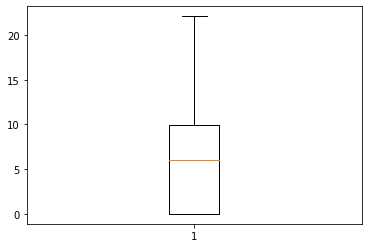

In [53]:
plt.boxplot(df["Superplasticizer"])

In [54]:
#as you can see outliers are removed

In [55]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,23.237900,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,23.237900,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,18.234583,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,18.234583,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,14.092551,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,16.625282,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,17.949930,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,12.186058,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,12.613485,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


(array([ 44.,  56.,  63., 144., 200., 159.,  78., 127.,  58.,  48.]),
 array([ 801. ,  835.4,  869.8,  904.2,  938.6,  973. , 1007.4, 1041.8,
        1076.2, 1110.6, 1145. ]),
 <BarContainer object of 10 artists>)

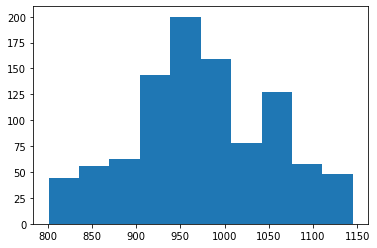

In [56]:
# 6)Coarse Aggregate
plt.hist(df["Coarse Aggregate"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb971d73520>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb971d73ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb971d73250>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb971d810a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb971d81370>],
 'means': []}

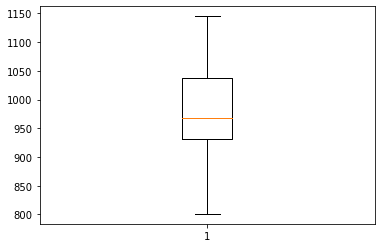

In [57]:
# as you can see data is not skewed
# check for outliers
plt.boxplot(df["Coarse Aggregate"])

In [58]:
# as you can see there are no outliers

In [59]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,23.237900,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,23.237900,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,18.234583,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,18.234583,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,14.092551,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,16.625282,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,17.949930,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,12.186058,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,12.613485,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


(array([ 68.,  33.,  83.,  79., 171., 243., 102., 103.,  78.,  17.]),
 array([594. , 629.1, 664.2, 699.3, 734.4, 769.5, 804.6, 839.7, 874.8,
        909.9, 945. ]),
 <BarContainer object of 10 artists>)

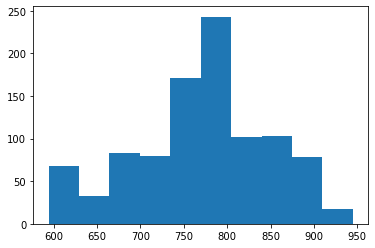

In [60]:
# 7) Fine Aggregate
plt.hist(df["Fine Aggregate"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb951f897c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb951f89d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb971e94d60>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb951f9b340>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb951f9b610>],
 'means': []}

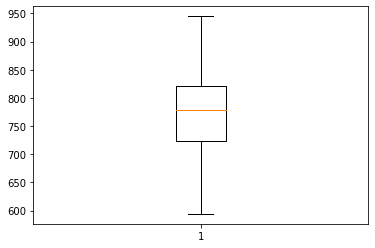

In [61]:
# as you can see here data is not skewed
# check for outliers
plt.boxplot(df["Fine Aggregate"])

In [62]:
# there are no outliers

(array([714.,  82., 119.,   3.,  26.,   0.,   0.,  13.,   0.,  20.]),
 array([  1. ,  37.4,  73.8, 110.2, 146.6, 183. , 219.4, 255.8, 292.2,
        328.6, 365. ]),
 <BarContainer object of 10 artists>)

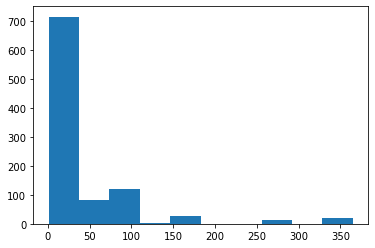

In [63]:
# 8)Age
plt.hist(df["Age"])

(array([  2., 125.,   0., 118.,  61., 408.,  82., 119.,  29.,  33.]),
 array([0.        , 0.58998974, 1.17997947, 1.76996921, 2.35995894,
        2.94994868, 3.53993841, 4.12992815, 4.71991788, 5.30990762,
        5.89989735]),
 <BarContainer object of 10 artists>)

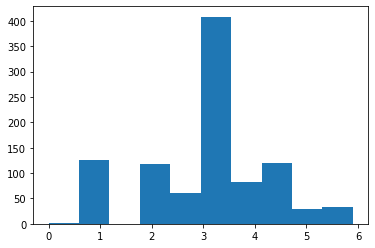

In [64]:
# data is skewed but cannot be transformed properly
log_age=np.log(df["Age"])
plt.hist(log_age)

(array([245.,  61., 408.,  82., 119.,   3.,  26.,   0.,  13.,  20.]),
 array([ 1.        ,  2.81049732,  4.62099463,  6.43149195,  8.24198927,
        10.05248659, 11.8629839 , 13.67348122, 15.48397854, 17.29447586,
        19.10497317]),
 <BarContainer object of 10 artists>)

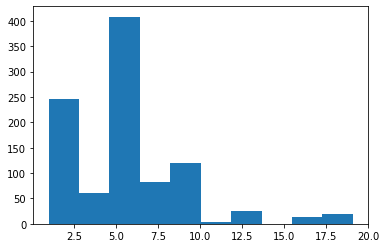

In [65]:
# square root 
sqrt_age=[i**0.5 for i in df["Age"]]
plt.hist(sqrt_age)

In [66]:
# as you can see log transformation is giving a better transformation
# hence we use log transformation

### log transformation on Age column

In [67]:
df["Age"]=np.log(df["Age"])

(array([  2., 125.,   0., 118.,  61., 408.,  82., 119.,  29.,  33.]),
 array([0.        , 0.58998974, 1.17997947, 1.76996921, 2.35995894,
        2.94994868, 3.53993841, 4.12992815, 4.71991788, 5.30990762,
        5.89989735]),
 <BarContainer object of 10 artists>)

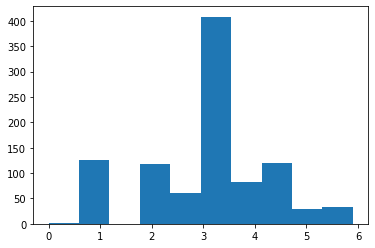

In [68]:
plt.hist(df["Age"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb9530ec280>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb9528723d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb952496af0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb952d9cac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb952865490>],
 'means': []}

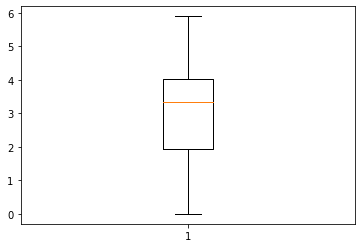

In [69]:
# check for outliers
plt.boxplot(df["Age"])

In [70]:
# there are no outliers

In [71]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,23.237900,0.0,0.0,162.0,2.5,1040.0,676.0,3.332205,79.99
1,23.237900,0.0,0.0,162.0,2.5,1055.0,676.0,3.332205,61.89
2,18.234583,142.5,0.0,228.0,0.0,932.0,594.0,5.598422,40.27
3,18.234583,142.5,0.0,228.0,0.0,932.0,594.0,5.899897,41.05
4,14.092551,132.4,0.0,192.0,0.0,978.4,825.5,5.886104,44.30
...,...,...,...,...,...,...,...,...,...
1025,16.625282,116.0,90.3,179.6,8.9,870.1,768.3,3.332205,44.28
1026,17.949930,0.0,115.6,196.0,10.4,817.9,813.4,3.332205,31.18
1027,12.186058,139.4,108.6,192.7,6.1,892.4,780.0,3.332205,23.70
1028,12.613485,186.7,0.0,175.6,11.3,989.6,788.9,3.332205,32.77


(array([ 44., 132., 153., 175., 187., 106.,  95.,  42.,  30.,  13.]),
 array([ 2.33 , 10.357, 18.384, 26.411, 34.438, 42.465, 50.492, 58.519,
        66.546, 74.573, 82.6  ]),
 <BarContainer object of 10 artists>)

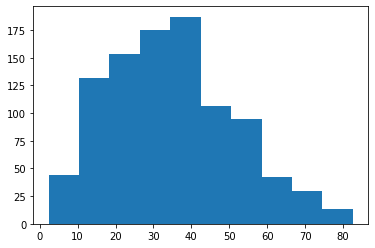

In [72]:
# 9) strength
plt.hist(df["Strength"])

(array([  2.,   1.,   6.,  24.,  67.,  91., 169., 281., 250.,  86.]),
 array([0.84586827, 1.20268241, 1.55949655, 1.91631069, 2.27312483,
        2.62993897, 2.98675312, 3.34356726, 3.7003814 , 4.05719554,
        4.41400968]),
 <BarContainer object of 10 artists>)

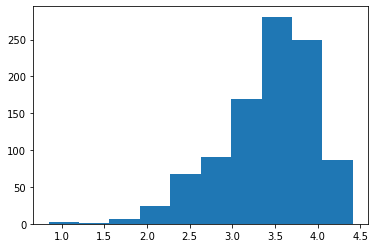

In [73]:
# as you can see data is a little bit skewed
log_str=np.log(df["Strength"])
plt.hist(log_str)

(array([  6.,  22.,  77.,  93., 160., 183., 215., 134.,  59.,  28.]),
 array([1.52643375, 2.2826358 , 3.03883784, 3.79503989, 4.55124194,
        5.30744398, 6.06364603, 6.81984808, 7.57605012, 8.33225217,
        9.08845421]),
 <BarContainer object of 10 artists>)

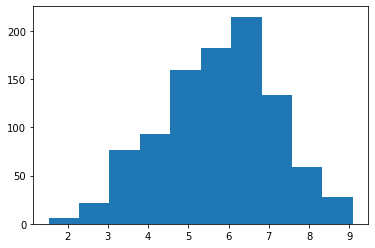

In [74]:
sqr_str=[i**0.5 for i in df["Strength"]]
plt.hist(sqr_str)

In [78]:
# square root transofrmation is giving a better transformation hence we use it

### square root transformation on strength

In [79]:
df["Strength"]=sqr_str

(array([  6.,  22.,  77.,  93., 160., 183., 215., 134.,  59.,  28.]),
 array([1.52643375, 2.2826358 , 3.03883784, 3.79503989, 4.55124194,
        5.30744398, 6.06364603, 6.81984808, 7.57605012, 8.33225217,
        9.08845421]),
 <BarContainer object of 10 artists>)

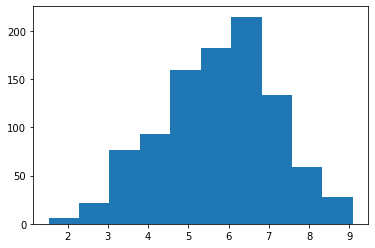

In [80]:
plt.hist(df["Strength"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb954326370>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb954326850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb954326040>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb954326ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb9543272b0>],
 'means': []}

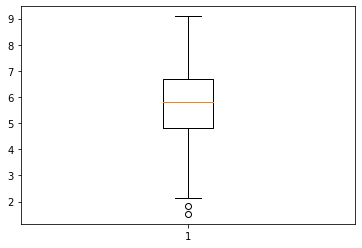

In [81]:
# check for outliers
plt.boxplot(df["Strength"])

In [82]:
# as you can see there are some outliers
q1=df["Strength"].quantile(0.25)
q3=df["Strength"].quantile(0.75)
IQR=q3-q1
max1=q3+1.5*IQR
min1=q1-1.5*IQR
upper=df["Strength"]>=max1
lower=df["Strength"]<=min1
upper_in=[]
lower_in=[]
for i in upper.index:
    if upper[i]==True:
        upper_in.append(i)
for i in lower.index:
    if lower[i]==True:
        lower_in.append(i)

In [84]:
print(upper_in)
print(lower_in)

[]
[688, 705]


In [85]:
for i in lower_in:
    df.drop(i,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb95677c4f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb9558a25e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb95677c2e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb9533018b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb9533018e0>],
 'means': []}

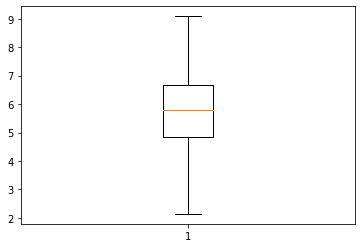

In [86]:
plt.boxplot(df["Strength"])

In [87]:
# as you can see there are no outliers

In [88]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,23.237900,0.0,0.0,162.0,2.5,1040.0,676.0,3.332205,8.943713
1,23.237900,0.0,0.0,162.0,2.5,1055.0,676.0,3.332205,7.867020
2,18.234583,142.5,0.0,228.0,0.0,932.0,594.0,5.598422,6.345865
3,18.234583,142.5,0.0,228.0,0.0,932.0,594.0,5.899897,6.407027
4,14.092551,132.4,0.0,192.0,0.0,978.4,825.5,5.886104,6.655825
...,...,...,...,...,...,...,...,...,...
1025,16.625282,116.0,90.3,179.6,8.9,870.1,768.3,3.332205,6.654322
1026,17.949930,0.0,115.6,196.0,10.4,817.9,813.4,3.332205,5.583905
1027,12.186058,139.4,108.6,192.7,6.1,892.4,780.0,3.332205,4.868265
1028,12.613485,186.7,0.0,175.6,11.3,989.6,788.9,3.332205,5.724509


# All transformation

In [89]:
# 1)cement - square root transformation
# 2)Age - log transformation
# 3)Strength - square root transformation
# while predicting transformation in these variables accordingly

In [90]:
# check for any data cleaning suggestions

In [91]:
from autoviz.classify_method import data_cleaning_suggestions
data_cleaning_suggestions(df)

Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nullpercent,NuniquePercent,dtype,Nuniques,Nulls,Least num. of categories,Data cleaning improvement suggestions
Cement,0.000000,27.794872,float64,271,0,0,
Blast Furnace Slag,0.000000,18.256410,float64,178,0,0,
Fly Ash,0.000000,15.589744,float64,152,0,0,
Water,0.000000,18.974359,float64,185,0,0,
Superplasticizer,0.000000,11.076923,float64,108,0,0,
Coarse Aggregate,0.000000,28.615385,float64,279,0,0,
Fine Aggregate,0.000000,30.256410,float64,295,0,0,
Age,0.000000,1.435897,float64,14,0,0,
Strength,0.000000,84.307692,float64,822,0,0,


In [92]:
# as you can see no suggestions are given means we can go making a model

# First regression model

In [93]:
y=df["Strength"]

In [94]:
del df["Strength"]

In [95]:
x=df

In [96]:
x

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,23.237900,0.0,0.0,162.0,2.5,1040.0,676.0,3.332205
1,23.237900,0.0,0.0,162.0,2.5,1055.0,676.0,3.332205
2,18.234583,142.5,0.0,228.0,0.0,932.0,594.0,5.598422
3,18.234583,142.5,0.0,228.0,0.0,932.0,594.0,5.899897
4,14.092551,132.4,0.0,192.0,0.0,978.4,825.5,5.886104
...,...,...,...,...,...,...,...,...
1025,16.625282,116.0,90.3,179.6,8.9,870.1,768.3,3.332205
1026,17.949930,0.0,115.6,196.0,10.4,817.9,813.4,3.332205
1027,12.186058,139.4,108.6,192.7,6.1,892.4,780.0,3.332205
1028,12.613485,186.7,0.0,175.6,11.3,989.6,788.9,3.332205


In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
re=LinearRegression()
re.fit(x_train,y_train)
print("r square for training:",re.score(x_train,y_train))
print("r square for testing:",re.score(x_test,y_test))

r square for training: 0.8300092104249004
r square for testing: 0.8458293900066384


In [98]:
# coefficients
print(re.coef_)

[ 0.37176786  0.0093203   0.00802192 -0.02013692 -0.00630599  0.00105589
  0.00176072  0.77006193]


# Multicollinearity

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_vif=pd.DataFrame()
df_vif["Features"]=x.columns
vif=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
df_vif["VIF"]=vif
df_vif

,Features,VIF
0,Cement,48.158496
1,Blast Furnace Slag,3.246631
2,Fly Ash,4.604738
3,Water,104.671005
4,Superplasticizer,6.106059
5,Coarse Aggregate,92.354492
6,Fine Aggregate,68.776000
7,Age,8.568730


In [100]:
# as you can see there is multocliinearity in some varaibles hence 
# we use ridge regression

# Heteroscedasticity

Text(0, 0.5, 'Residuals')

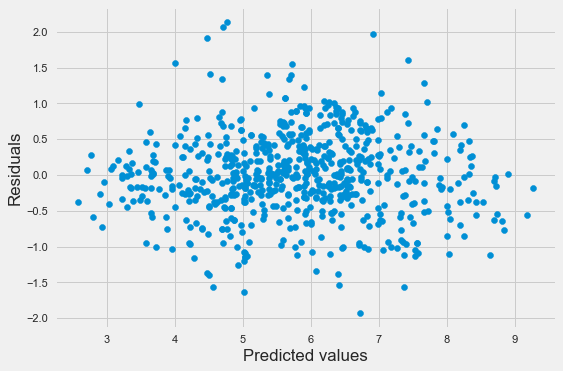

In [101]:
y_actual=list(y_train)
y_pred=re.predict(x_train)
y_pred=list(y_pred)
error=[]
for i in range(len(y_actual)):
    error.append(y_actual[i]-y_pred[i])
residual=[]
for i in range(len(error)):
    residual.append(error[i]-np.mean(error))
plt.scatter(y_pred,residual)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")

In [102]:
# as you can see it does not clearly shows there is heteroscedasticity or not
# hence we use white's test 

In [103]:
X_white=x

In [104]:
import statsmodels.api as sm
x1 = sm.add_constant(X_white)
model = sm.OLS(y, x1).fit()
from statsmodels.stats.diagnostic import het_white
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))



{'Test Statistic': 237.97974590251536, 'Test Statistic p-value': 1.923638546690987e-28, 'F-Statistic': 6.824814405737713, 'F-Test p-value': 1.6383901194286606e-33}


In [105]:
# Hypothesis
# H0: no heteroscedasticity
# H1: heteroscedasticity
# as you can see here p-value is less than 0.05 hence we reject H0
# i.e there is heteroscedasticity

In [106]:
# to reduce the heteroscedasticity we transform our dependent varaible into log transformation

In [108]:
y_new=np.log(y)

In [109]:
y_new

0       2.190951
1       2.062679
2       1.847803
3       1.857395
4       1.895492
          ...   
1025    1.895267
1026    1.719888
1027    1.582738
1028    1.744757
1029    1.739079
Name: Strength, Length: 975, dtype: float64

In [110]:
x

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,23.237900,0.0,0.0,162.0,2.5,1040.0,676.0,3.332205
1,23.237900,0.0,0.0,162.0,2.5,1055.0,676.0,3.332205
2,18.234583,142.5,0.0,228.0,0.0,932.0,594.0,5.598422
3,18.234583,142.5,0.0,228.0,0.0,932.0,594.0,5.899897
4,14.092551,132.4,0.0,192.0,0.0,978.4,825.5,5.886104
...,...,...,...,...,...,...,...,...
1025,16.625282,116.0,90.3,179.6,8.9,870.1,768.3,3.332205
1026,17.949930,0.0,115.6,196.0,10.4,817.9,813.4,3.332205
1027,12.186058,139.4,108.6,192.7,6.1,892.4,780.0,3.332205
1028,12.613485,186.7,0.0,175.6,11.3,989.6,788.9,3.332205


In [111]:
# let's create a model again
x_train,x_test,y_train,y_test=train_test_split(x,y_new,test_size=0.3,random_state=42)
re=LinearRegression()
re.fit(x_train,y_train)
print("r square for training:",re.score(x_train,y_train))
print("r square for testing:",re.score(x_test,y_test))

r square for training: 0.8066884488600522
r square for testing: 0.8235093308982906


Text(0, 0.5, 'Residuals')

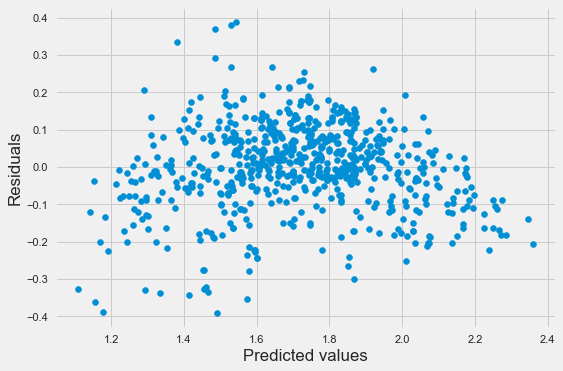

In [112]:
# check for heteroscedasticity
y_actual=list(y_train)
y_pred=re.predict(x_train)
y_pred=list(y_pred)
error=[]
for i in range(len(y_actual)):
    error.append(y_actual[i]-y_pred[i])
residual=[]
for i in range(len(error)):
    residual.append(error[i]-np.mean(error))
plt.scatter(y_pred,residual)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")

In [113]:
# white's test

In [114]:
X_white

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,23.237900,0.0,0.0,162.0,2.5,1040.0,676.0,3.332205
1,23.237900,0.0,0.0,162.0,2.5,1055.0,676.0,3.332205
2,18.234583,142.5,0.0,228.0,0.0,932.0,594.0,5.598422
3,18.234583,142.5,0.0,228.0,0.0,932.0,594.0,5.899897
4,14.092551,132.4,0.0,192.0,0.0,978.4,825.5,5.886104
...,...,...,...,...,...,...,...,...
1025,16.625282,116.0,90.3,179.6,8.9,870.1,768.3,3.332205
1026,17.949930,0.0,115.6,196.0,10.4,817.9,813.4,3.332205
1027,12.186058,139.4,108.6,192.7,6.1,892.4,780.0,3.332205
1028,12.613485,186.7,0.0,175.6,11.3,989.6,788.9,3.332205


In [118]:
import statsmodels.api as sm
x2 = sm.add_constant(X_white)
model = sm.OLS(y_new, x2).fit()
from statsmodels.stats.diagnostic import het_white
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))



{'Test Statistic': 271.32327357200876, 'Test Statistic p-value': 1.6924409868240034e-34, 'F-Statistic': 8.14974711802324, 'F-Test p-value': 1.121467194126882e-41}


In [119]:
# there is still heteroscedasticity

In [121]:
# we need to get more and more data to avoid heteroscedasticity

# Feature selection

In [124]:
x

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,23.237900,0.0,0.0,162.0,2.5,1040.0,676.0,3.332205
1,23.237900,0.0,0.0,162.0,2.5,1055.0,676.0,3.332205
2,18.234583,142.5,0.0,228.0,0.0,932.0,594.0,5.598422
3,18.234583,142.5,0.0,228.0,0.0,932.0,594.0,5.899897
4,14.092551,132.4,0.0,192.0,0.0,978.4,825.5,5.886104
...,...,...,...,...,...,...,...,...
1025,16.625282,116.0,90.3,179.6,8.9,870.1,768.3,3.332205
1026,17.949930,0.0,115.6,196.0,10.4,817.9,813.4,3.332205
1027,12.186058,139.4,108.6,192.7,6.1,892.4,780.0,3.332205
1028,12.613485,186.7,0.0,175.6,11.3,989.6,788.9,3.332205


In [125]:
y

0       8.943713
1       7.867020
2       6.345865
3       6.407027
4       6.655825
          ...   
1025    6.654322
1026    5.583905
1027    4.868265
1028    5.724509
1029    5.692100
Name: Strength, Length: 975, dtype: float64

In [126]:
# filter methods
from sklearn.feature_selection import f_regression
f_regression(x,y)

(array([262.94419787,   9.82056388,   1.93667365,  57.93175669,
        102.7854922 ,  15.62695892,  57.56367491, 535.07517662]),
 array([1.59095042e-52, 1.77737931e-03, 1.64348213e-01, 6.40156659e-14,
        4.96480115e-23, 8.27306300e-05, 7.63833362e-14, 1.11194006e-94]))

In [127]:
from sklearn.feature_selection import r_regression
r_regression(x,y)

array([ 0.46124574,  0.09996112, -0.04456973, -0.23705187,  0.30910289,
       -0.12572482, -0.23633979,  0.59565653])

In [128]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
re=LinearRegression()
re.fit(x_train,y_train)
print("r square for tarining:",re.score(x_train,y_train))
print("r square for testing:",re.score(x_test,y_test))

r square for tarining: 0.8300092104249004
r square for testing: 0.8458293900066384


In [159]:
x

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,23.237900,0.0,0.0,162.0,2.5,1040.0,676.0,3.332205
1,23.237900,0.0,0.0,162.0,2.5,1055.0,676.0,3.332205
2,18.234583,142.5,0.0,228.0,0.0,932.0,594.0,5.598422
3,18.234583,142.5,0.0,228.0,0.0,932.0,594.0,5.899897
4,14.092551,132.4,0.0,192.0,0.0,978.4,825.5,5.886104
...,...,...,...,...,...,...,...,...
1025,16.625282,116.0,90.3,179.6,8.9,870.1,768.3,3.332205
1026,17.949930,0.0,115.6,196.0,10.4,817.9,813.4,3.332205
1027,12.186058,139.4,108.6,192.7,6.1,892.4,780.0,3.332205
1028,12.613485,186.7,0.0,175.6,11.3,989.6,788.9,3.332205


# Wrapper methods

In [129]:
# recursive feature elimination
# check out of 8 which are 6 best
from sklearn.feature_selection import RFE
ref=RFE(re,n_features_to_select=6)
# fit the data
fit=ref.fit(x_train,y_train)
print("ranking:",fit.ranking_)


ranking: [1 1 1 1 1 3 2 1]


In [130]:
# forward feature selection
from mlxtend.feature_selection import SequentialFeatureSelector
ffs=SequentialFeatureSelector(re,k_features=6,n_jobs=1,forward=True,scoring="r2")
fit=ffs.fit(x_train,y_train)
print("top 6 features:",fit.k_feature_names_)

top 6 features: ('Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Fine Aggregate', 'Age')


# Over Fitting

In [131]:
from sklearn.model_selection import KFold,cross_val_score
folds=KFold(n_splits=5,shuffle=True,random_state=42)
scores=cross_val_score(re,x_train,y_train,cv=folds)
print(scores)

[0.84719538 0.84139408 0.83848432 0.78097597 0.801191  ]


In [132]:
np.mean(scores)

0.8218481498552993

In [133]:
# training value is close to cross validation score hence no overfitting

# Ridge regression model

In [134]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=10)
ridge.fit(x_train,y_train)
print("ridge r square for training:",ridge.score(x_train,y_train))
print("ridge r square for testing:",ridge.score(x_test,y_test))

ridge r square for training: 0.8299433811252561
ridge r square for testing: 0.8448785196162955


In [135]:
# to select the best model we are using compare model algorith from pycaret
# for that code is available on the google cloba notebook

# According to pycaret the best model are light gradient boosting machine and XGboost

In [141]:
# hence we use xgboost

In [142]:
from xgboost import XGBRegressor
xgb=XGBRegressor()


In [145]:
xgb.fit(x_train,y_train)
print("r square for training by xgb:",xgb.score(x_train,y_train))
print("r square for testing by xgb:",xgb.score(x_test,y_test))

r square for training by xgb: 0.9961721380507655
r square for testing by xgb: 0.9313044243888392


In [154]:
print(y_train)

562     4.906119
613     3.370460
1004    7.268425
699     3.091925
1018    6.104916
          ...   
124     7.120393
314     4.584757
912     6.600758
479     6.166036
117     7.733046
Name: Strength, Length: 682, dtype: float64


In [155]:
print(xgb.predict(x_train))

[4.894168  3.4063241 7.2794023 3.0699317 6.103502  6.591751  5.070745
 5.2233973 5.643307  5.3235765 5.4817867 6.35189   6.7792935 6.6934524
 3.8309197 5.056675  4.454918  8.071352  5.0603995 6.9010406 5.4506273
 5.8218765 8.913346  4.1899824 4.7615566 7.398408  4.5976934 6.409494
 7.218451  4.9227386 8.945679  5.717113  6.4459863 3.9250164 5.931931
 3.6396332 4.9295993 6.744759  5.746099  8.481051  6.301035  8.073584
 4.2013474 6.4151955 5.0770288 8.188806  6.7917795 8.630262  6.9594026
 6.327462  6.1326613 4.9718785 6.83766   5.4130077 2.1741552 6.2684264
 6.5168333 7.5111976 5.592988  6.594359  2.6153443 7.5306454 6.0158353
 2.885075  5.2918286 6.1066384 3.4291065 5.071255  6.5694175 4.423275
 6.0822077 4.877381  8.1720085 6.483677  4.6655216 4.279779  6.6122
 3.5639846 8.264562  5.781194  6.483489  5.707667  5.7056546 4.1927285
 7.2610707 7.335525  5.4128237 2.6297984 6.2246923 5.6749196 7.993025
 6.851388  7.8026986 5.886273  4.2346096 5.2510076 7.4634533 4.7951016
 3.1351595 3.98

In [156]:
print(y_test)

243    6.392183
838    5.261179
213    5.944746
511    8.105554
66     6.685806
         ...   
598    3.635932
964    5.465345
915    5.384236
963    6.118006
682    4.904080
Name: Strength, Length: 293, dtype: float64


In [157]:
print(xgb.predict(x_test))

[5.8432283 5.4706583 5.8557353 8.248924  6.4273934 5.480081  5.4977903
 5.706238  7.8028197 6.141648  5.1978145 5.400272  2.6205552 4.9191155
 8.164365  5.8118486 4.6163554 5.869465  3.924901  7.555129  7.0803337
 7.1956124 2.8552163 6.1554017 7.332727  4.024478  8.426186  6.284595
 6.993744  6.29707   6.2984786 7.369971  5.759658  6.291664  7.3357244
 4.404683  5.686927  3.0944064 6.0668015 6.6749935 7.4754295 7.2030196
 4.4447875 6.3773    4.8569202 6.1198597 5.9481773 8.377005  4.5292535
 4.78674   5.885897  6.2835464 6.101671  5.215869  7.209175  7.5228705
 6.334522  6.046842  4.361232  3.9949415 5.9950876 6.794122  6.691685
 5.9827147 4.13946   5.9854712 6.9969187 5.946588  7.315941  6.0801864
 4.6202693 4.85369   4.0501623 3.3898525 6.7890463 7.1742196 7.463027
 5.7108765 3.8522587 6.6721225 6.260986  6.4291625 3.5931349 5.5110693
 6.1116247 8.11676   3.7723475 2.9221635 6.4513245 7.1515207 3.4113111
 6.091379  7.2615595 6.664786  4.7017994 5.754038  5.528012  5.8697467
 3.552697

In [158]:
x_test

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
243,15.155857,0.0,118.2,195.2,6.1,1028.1,757.6,4.605170
838,12.609520,149.0,116.0,175.0,15.0,953.0,720.0,3.332205
213,15.165751,0.0,118.3,195.5,4.6,1029.4,758.6,4.605170
511,20.591260,22.0,132.0,178.0,8.5,822.0,750.0,4.025352
66,11.815244,209.4,0.0,192.0,0.0,1047.0,806.9,5.886104
...,...,...,...,...,...,...,...,...
598,18.411953,0.0,0.0,197.0,0.0,968.0,781.0,1.098612
964,11.987493,170.2,132.6,191.6,8.5,814.1,805.3,3.332205
915,12.449900,184.0,143.0,194.0,9.0,880.0,699.0,3.332205
963,12.247449,236.8,0.0,173.8,11.9,1069.3,674.8,3.332205


# Prediction

In [148]:
# 1)cement - square root transformation
# 2)Age - log transformation
# 3)Strength - square root transformation
# while predicting transformation in these variables accordingly

In [164]:
#Cement	Blast Furnace Slag	Fly Ash	Water	Superplasticizer	Coarse Aggregate	Fine Aggregate	Age
cement=float(input("amount of cement:"))
cement_log=cement**0.5
Blast_Furnace=float(input("Value of Blast Furnace Slag:"))
Fly_Ash=float(input("Fly Ash value:"))
water=float(input("Water quantity:"))
Superplasticizer=float(input("Superplasticizer value:"))
Coarse_Aggregate=float(input("Coarse Aggregate value:"))
Fine_Aggregate=float(input("Fine Aggregate value:"))
age=float(input("age of concrete:"))
age_log=np.log(age)
values=[cement_log,Blast_Furnace,Fly_Ash,water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,age_log]
test_data=np.array(values).reshape(1,-1)
predticted_value=xgb.predict(test_data)
print("Predicted strength:",predticted_value**2)

amount of cement:332.5
Value of Blast Furnace Slag:142.5
Fly Ash value:0
Water quantity:228
Superplasticizer value:0
Coarse Aggregate value:932
Fine Aggregate value:594
age of concrete:270
Predicted strength: [39.940155]
